#🔥 HotMart Data Analyst Challenge 📊

##⚙️ Preparing the environment for the challenge

In [1]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=c6b55c494ad36a692683c12979cf0a4c83915cbafa52d41040ea7b2e8e92302d
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [2]:
import pandasql as ps

In [3]:
import matplotlib.pyplot as plt

In [4]:
!pip install pandas

In [5]:
import pandas as pd

In [6]:
!wget https://raw.githubusercontent.com/AnaCarolNP/Desafio/main/Producers.csv   # Importando a base de dados

--2024-07-12 12:04:36--  https://raw.githubusercontent.com/AnaCarolNP/Desafio/main/Producers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 357 [text/plain]
Saving to: ‘Producers.csv’

Producers.csv       100%[===================>]     357  --.-KB/s    in 0s      

2024-07-12 12:04:36 (5.26 MB/s) - ‘Producers.csv’ saved [357/357]



In [7]:
!wget https://raw.githubusercontent.com/AnaCarolNP/Desafio/main/Products.csv

--2024-07-12 12:04:39--  https://raw.githubusercontent.com/AnaCarolNP/Desafio/main/Products.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4586 (4.5K) [text/plain]
Saving to: ‘Products.csv’

Products.csv        100%[===================>]   4.48K  --.-KB/s    in 0s      

2024-07-12 12:04:39 (33.4 MB/s) - ‘Products.csv’ saved [4586/4586]



In [8]:
!wget https://raw.githubusercontent.com/AnaCarolNP/Desafio/main/Sales.csv

--2024-07-12 12:04:42--  https://raw.githubusercontent.com/AnaCarolNP/Desafio/main/Sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 656281 (641K) [text/plain]
Saving to: ‘Sales.csv’

Sales.csv           100%[===================>] 640.90K  --.-KB/s    in 0.05s   

2024-07-12 12:04:42 (11.6 MB/s) - ‘Sales.csv’ saved [656281/656281]



### 📰 Dataframes

Working with dataframes

✔️ Producers

In [9]:
producers = pd.read_csv('/content/Producers.csv')
ps.sqldf("SELECT * FROM producers LIMIT 10")

,producer_id,registry_date,country
0,1,2018-02-01,BRASIL
1,2,2018-01-04,COLOMBIA
2,3,2020-01-02,BRASIL
3,4,2021-01-02,COLOMBIA
4,5,2019-02-11,BRASIL
5,6,2019-11-02,MEXICO
6,7,2020-07-19,BRASIL
7,8,2019-01-11,BRASIL
8,9,2018-04-25,EUA
9,10,2020-01-12,BRASIL


✔️ Products

In [10]:
products = pd.read_csv('/content/Products.csv')
ps.sqldf("SELECT * FROM products LIMIT 10")

,product_id,producer_id,registry_date,recovery_active,member_area_active,deletion_date,niche,base_price,type
0,218834610,1,2020-03-30,1,1,None,Marketing,780,Curso
1,253458328,4,2021-05-24,0,0,None,Educação Infantil,560,Assinatura
2,466262361,6,2020-11-13,1,1,None,Empreendedorismo,800,Curso
3,613311395,2,2018-02-28,0,0,None,Financas,680,Curso
4,528943857,2,2018-09-15,1,0,None,Financas,500,Curso
5,937565380,5,2019-02-11,1,1,None,Financas,850,Palestra
6,838284194,2,2019-01-18,1,1,None,Financas,970,Curso
7,204306513,2,2018-11-20,1,1,None,Financas,660,Curso
8,399974968,1,2018-05-21,0,0,None,Tecnologia e Inovação,45,Ebook
9,858972318,2,2018-07-13,1,0,None,Financas,"1,300.00",Palestra


✔️ Sales

In [11]:
sales = pd.read_csv('/content/Sales.csv')
ps.sqldf("SELECT * FROM sales LIMIT 10")

,purchase_id,purchase_date,product_id,product_price,service_tax,comission_value,has_coupon,discount,refund,cancelled,chargeback
0,696733696,2022-06-21,275653577,48.00,7.2,36.00,1,0.1,0,0,0
1,957560528,2021-01-02,399974968,45.00,4.5,40.50,0,0.0,1,0,0
2,800828744,2020-07-07,489748266,"1,000.00",100.0,900.00,0,0.0,0,0,0
3,964632300,2022-11-24,545252229,210.00,21.0,168.00,1,0.1,0,0,0
4,830193347,2021-09-05,489748266,"1,000.00",100.0,900.00,0,0.0,0,0,0
5,372957983,2022-10-14,545252229,210.00,21.0,189.00,0,0.0,0,0,0
6,708566332,2021-04-10,234382743,30.00,3.0,18.00,1,0.3,0,0,0
7,392512570,2022-03-22,897822682,73.00,7.3,58.40,1,0.1,0,0,0
8,804916737,2022-03-19,899309605,52.00,5.2,41.60,1,0.1,0,0,0
9,292774792,2020-04-14,399974968,45.00,5.4,35.10,1,0.1,0,1,0


Based on the available data "SQL Datasets.zip". We would like to know:

###1️⃣ - The top product with most valid purchases (without refund, cancellation or chargeback), in each niche with deactivated membership area and activated recovery.


Separate the products from valid purchases, that is, without refunds (refund.sales = 0), without cancellations (cancelled.sales = 0), and without chargebacks (chargeback.sales = 0).


Select sales of products that were not refunded, canceled or refunded.

In [12]:
valid_sales = ps.sqldf("SELECT product_id, product_price, purchase_date, purchase_id FROM sales WHERE refund = 0 AND cancelled = 0 AND chargeback = 0")

In [13]:
valid_sales

,product_id,product_price,purchase_date,purchase_id
0,275653577,48.00,2022-06-21,696733696
1,489748266,"1,000.00",2020-07-07,800828744
2,545252229,210.00,2022-11-24,964632300
3,489748266,"1,000.00",2021-09-05,830193347
4,545252229,210.00,2022-10-14,372957983
...,...,...,...,...
8207,844949729,390.00,2022-12-30,259172915
8208,399463467,"1,488.00",2022-04-25,264201938
8209,399974968,45.00,2020-04-04,289956962
8210,264261718,560.00,2022-02-04,345494529


Select the products in the products table that have membership area disabled and recovery enabled.

In [14]:
valid_products = ps.sqldf("SELECT product_id, niche, member_area_active, recovery_active  FROM products WHERE member_area_active = 0 AND recovery_active = 1")

In [15]:
valid_products

,product_id,niche,member_area_active,recovery_active
0,528943857,Financas,0,1
1,858972318,Financas,0,1
2,328762963,Saúde e Alimentação,0,1
3,983844542,Empreendedorismo,0,1
4,324917616,Viagens,0,1
5,428909199,Marketing,0,1
6,348532296,Financas,0,1
7,844949729,Empreendedorismo,0,1
8,903828613,Financas,0,1
9,902401640,Saúde e Alimentação,0,1


Combine the valid_sales table with the valid_produtos table using the product_id into a new table (join_product). Then, group by the product's niche and by product_id, ordering the products from the most repeated to the least repeated by niche.

In [16]:
join_product = ps.sqldf("SELECT vs.product_id, vs.product_price, vp.niche FROM valid_sales vs JOIN valid_products vp ON vs.product_id = vp.product_id")

In [17]:
df_1 = ps.sqldf("SELECT niche, product_id, product_price, COUNT(product_id) AS product_count FROM join_product GROUP BY niche, product_id ORDER BY niche, product_count DESC")

In [18]:
df_1

,niche,product_id,product_price,product_count
0,Empreendedorismo,983844542,650.00,333
1,Empreendedorismo,844949729,390.00,127
2,Financas,348532296,680.00,49
3,Financas,264261718,560.00,37
4,Financas,858972318,"1,300.00",24
5,Financas,603531440,580.00,10
6,Financas,903828613,590.00,9
7,Saúde e Alimentação,260868848,640.00,148
8,Saúde e Alimentação,328762963,520.00,48
9,Saúde e Alimentação,868415522,"1,120.00",32


Final answer of chalenge number 1:

In [19]:
df_1_final = ps.sqldf("SELECT niche, product_id, MAX(product_count) as product_count FROM df_1 subquery GROUP BY niche")

In [20]:
df_1_final

,niche,product_id,product_count
0,Empreendedorismo,983844542,333
1,Financas,348532296,49
2,Saúde e Alimentação,260868848,148
3,Tecnologia e Inovação,719732475,169
4,Viagens,324917616,92


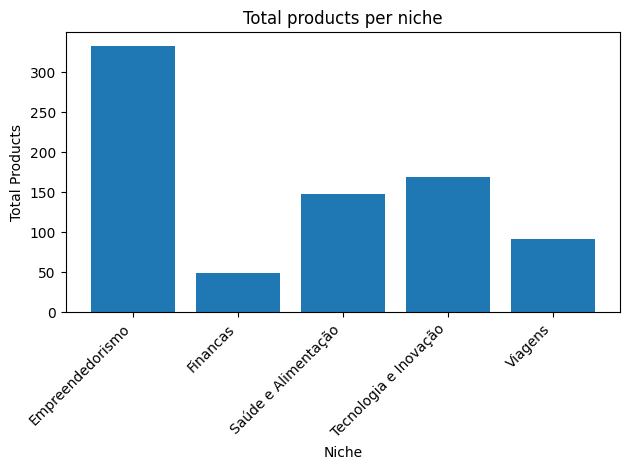

In [22]:
#Create the bar chart with the niche (x) and product_count (y) axes, using matplot lib.
plt.bar(df_1_final['niche'], df_1_final['product_count'])
plt.title("Total products per niche")
plt.xlabel("Niche")
plt.ylabel("Total Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###2️⃣ - The top 5 producers who joined Hotmart from 2019 onwards and achieved the highest commission using recovery.



First Step: Select only producers who joined Hotmart from 2019

In [23]:
new_producers = ps.sqldf("SELECT producer_id, registry_date FROM producers WHERE registry_date > 2019")

In [24]:
new_producers

,producer_id,registry_date
0,3,2020-01-02
1,4,2021-01-02
2,5,2019-02-11
3,6,2019-11-02
4,7,2020-07-19
5,8,2019-01-11
6,10,2020-01-12
7,11,2021-02-02
8,12,2020-09-02
9,13,2019-01-04


Select products with recovery activeted

In [25]:
recovery_products = ps.sqldf("SELECT product_id, producer_id, recovery_active  FROM products WHERE recovery_active = 1")

In [26]:
ps.sqldf("SELECT * FROM recovery_products LIMIT 10")

,product_id,producer_id,recovery_active
0,218834610,1,1
1,466262361,6,1
2,528943857,2,1
3,937565380,5,1
4,838284194,2,1
5,204306513,2,1
6,858972318,2,1
7,780973554,6,1
8,489748266,1,1
9,328762963,7,1


Join between new_producers table and recovery_products. This way the new table will return only products that were created by producers from 2019 and with recovery activeted

In [27]:
recovery_products2019 = ps.sqldf("SELECT np.producer_id, rp.product_id FROM new_producers np JOIN recovery_products rp ON np.producer_id = rp.producer_id")

In [28]:
recovery_products2019

,producer_id,product_id
0,3,465888720
1,3,585123782
2,3,844949729
3,3,983844542
4,4,924575748
5,5,382406448
6,5,603531440
7,5,642907827
8,5,937565380
9,6,241258270


Select from table sales, informations about sales by product

In [29]:
total_product = ps.sqldf("SELECT product_id, product_price, SUM(comission_value) AS total_comission, COUNT(product_id) AS product_count FROM sales GROUP BY product_id")

In [30]:
total_product

,product_id,product_price,total_comission,product_count
0,218834610,780.00,258523.20,400
1,234382743,30.00,11115.00,449
2,251959622,"1,520.00",1017.00,30
3,253458328,560.00,218103.20,469
4,260868848,640.00,103833.60,195
5,264261718,560.00,21352.80,46
6,275653577,48.00,14429.76,359
7,324917616,90.00,8509.50,115
8,325563626,660.00,90901.80,168
9,328762963,520.00,24226.80,56


In [31]:
# Join between total_product table and recovery_products2019 table to select only products with recovery actived
df_2 = ps.sqldf("SELECT rpr.producer_id, tp.total_comission, tp.product_count FROM total_product tp JOIN recovery_products2019 rpr ON tp.product_id = rpr.product_id GROUP BY producer_id ORDER BY total_comission DESC")

Answer to question number 2 of the challenge

In [33]:
top_producers = ps.sqldf("SELECT producer_id, total_comission FROM df_2 LIMIT 5")

In [34]:
top_producers

,producer_id,total_comission
0,7,103833.60
1,3,51866.10
2,6,38864.00
3,10,35700.00
4,13,31140.72


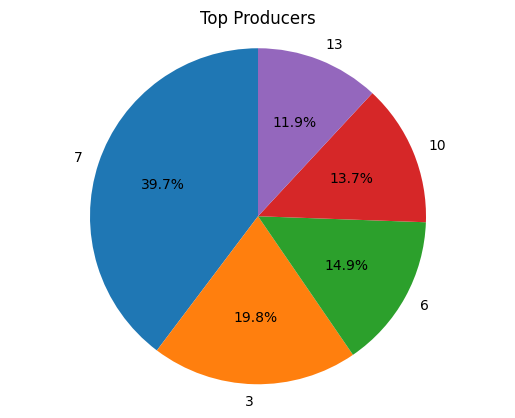

In [35]:
total_comission = top_producers['total_comission']
producer_id = top_producers['producer_id']

# Building the pizza graphic
plt.pie(total_comission, labels=producer_id, autopct='%1.1f%%', startangle=90)
plt.title('Top Producers')
plt.axis('equal')
plt.show()

##3️⃣ - List the number of completed sales from Brazilian producers in each weekday for the years 2020, 2021 and 2022 and the variation between the weekday sales from 2021/2020 and 2022/2021.

I understand a complete sale as a sale in which there was no refund, cancellation or chargeback. This was done in challenge number one, table valid_sales. Now we will get the table valid_sales and join with table products to return the ID of the producer.

In [36]:
purchases_from_2020 = ps.sqldf("SELECT vs.purchase_id, vs.product_id, p.producer_id, vs.purchase_date FROM valid_sales vs JOIN products p ON vs.product_id = p.product_id WHERE vs.purchase_date > 2020")

In [37]:
purchases_from_2020

,purchase_id,product_id,producer_id,purchase_date
0,696733696,275653577,10,2022-06-21
1,800828744,489748266,1,2020-07-07
2,964632300,545252229,4,2022-11-24
3,830193347,489748266,1,2021-09-05
4,372957983,545252229,4,2022-10-14
...,...,...,...,...
8192,259172915,844949729,3,2022-12-30
8193,264201938,399463467,13,2022-04-25
8194,289956962,399974968,1,2020-04-04
8195,345494529,264261718,8,2022-02-04


Separate purchases made only by Brazilian producers

In [38]:
brasilian_producers = ps.sqldf("SELECT * FROM producers WHERE country = 'BRASIL'")

In [45]:
brasilian_sales = ps.sqldf("SELECT pf.purchase_id, pf.product_id, pf.producer_id, pf.purchase_date, bp.country FROM purchases_from_2020 pf JOIN brasilian_producers bp ON pf.producer_id = bp.producer_id")

In [46]:
brasilian_sales

,purchase_id,product_id,producer_id,purchase_date,country
0,696733696,275653577,10,2022-06-21,BRASIL
1,800828744,489748266,1,2020-07-07,BRASIL
2,830193347,489748266,1,2021-09-05,BRASIL
3,392512570,897822682,7,2022-03-22,BRASIL
4,804916737,899309605,3,2022-03-19,BRASIL
...,...,...,...,...,...
6106,259172915,844949729,3,2022-12-30,BRASIL
6107,264201938,399463467,13,2022-04-25,BRASIL
6108,289956962,399974968,1,2020-04-04,BRASIL
6109,345494529,264261718,8,2022-02-04,BRASIL


Separating sales by year. As pandas sql does not support the EXTRACT function, I replaced EXTRACT with STRFTIME: SQLite uses the STRFTIME function for date and time manipulations. STRFTIME('%Y', purchase_date) extracts the year from the purchase_date column.

In [48]:
brasilian_sales_per_year = ps.sqldf('''SELECT
            purchase_id,
            product_id,
            producer_id,
            purchase_date,
            country,
            CASE
                WHEN STRFTIME('%Y', purchase_date) = '2020' THEN 1
                ELSE 0
            END AS "2020",
            CASE
                WHEN STRFTIME('%Y', purchase_date) = '2021' THEN 1
                ELSE 0
            END AS "2021",
            CASE
                WHEN STRFTIME('%Y', purchase_date) = '2022' THEN 1
                ELSE 0
            END AS "2022"
        FROM
            brasilian_sales
    ''')

In [49]:
brasilian_sales_per_year

,purchase_id,product_id,producer_id,purchase_date,country,2020,2021,2022
0,696733696,275653577,10,2022-06-21,BRASIL,0,0,1
1,800828744,489748266,1,2020-07-07,BRASIL,1,0,0
2,830193347,489748266,1,2021-09-05,BRASIL,0,1,0
3,392512570,897822682,7,2022-03-22,BRASIL,0,0,1
4,804916737,899309605,3,2022-03-19,BRASIL,0,0,1
...,...,...,...,...,...,...,...,...
6106,259172915,844949729,3,2022-12-30,BRASIL,0,0,1
6107,264201938,399463467,13,2022-04-25,BRASIL,0,0,1
6108,289956962,399974968,1,2020-04-04,BRASIL,1,0,0
6109,345494529,264261718,8,2022-02-04,BRASIL,0,0,1


In [50]:
df_3 = ps.sqldf('''SELECT
            strftime('%w', purchase_date) AS weekday_number,
            CASE
                WHEN strftime('%w', purchase_date) = '0' THEN 'Sunday'
                WHEN strftime('%w', purchase_date) = '1' THEN 'Monday'
                WHEN strftime('%w', purchase_date) = '2' THEN 'Tuesday'
                WHEN strftime('%w', purchase_date) = '3' THEN 'Wednesday'
                WHEN strftime('%w', purchase_date) = '4' THEN 'Thursday'
                WHEN strftime('%w', purchase_date) = '5' THEN 'Friday'
                WHEN strftime('%w', purchase_date) = '6' THEN 'Saturday'
            END AS weekday_name,
            COUNT(*) AS sales_count
        FROM
            brasilian_sales
        WHERE
            strftime('%Y', purchase_date) IN ('2020', '2021', '2022')
        GROUP BY
            weekday_number, weekday_name
        ORDER BY
            weekday_number''')

In [51]:
df_3

,weekday_number,weekday_name,sales_count
0,0,Sunday,1136
1,1,Monday,755
2,2,Tuesday,754
3,3,Wednesday,542
4,4,Thursday,570
5,5,Friday,889
6,6,Saturday,1386


Or, separated por year

In [52]:
df_3 = ps.sqldf('''SELECT
    strftime('%w', purchase_date) AS weekday_number,
    CASE
        WHEN strftime('%w', purchase_date) = '0' THEN 'Sunday'
        WHEN strftime('%w', purchase_date) = '1' THEN 'Monday'
        WHEN strftime('%w', purchase_date) = '2' THEN 'Tuesday'
        WHEN strftime('%w', purchase_date) = '3' THEN 'Wednesday'
        WHEN strftime('%w', purchase_date) = '4' THEN 'Thursday'
        WHEN strftime('%w', purchase_date) = '5' THEN 'Friday'
        WHEN strftime('%w', purchase_date) = '6' THEN 'Saturday'
    END AS weekday_name,
    SUM(CASE WHEN strftime('%Y', purchase_date) = '2020' THEN 1 ELSE 0 END) AS total_2020,
    SUM(CASE WHEN strftime('%Y', purchase_date) = '2021' THEN 1 ELSE 0 END) AS total_2021,
    SUM(CASE WHEN strftime('%Y', purchase_date) = '2022' THEN 1 ELSE 0 END) AS total_2022
FROM
    brasilian_sales_per_year
WHERE
    strftime('%Y', purchase_date) IN ('2020', '2021', '2022')
GROUP BY
    weekday_number, weekday_name
ORDER BY
    weekday_number''')

First part of the answer

In [53]:
df_3

,weekday_number,weekday_name,total_2020,total_2021,total_2022
0,0,Sunday,331,377,428
1,1,Monday,203,238,314
2,2,Tuesday,211,198,345
3,3,Wednesday,157,158,227
4,4,Thursday,166,151,253
5,5,Friday,253,262,374
6,6,Saturday,384,408,594


Second part of the answer. I just created two more columns with the percentage difference between the years.

In [54]:
ps.sqldf('''SELECT
            weekday_number,
            weekday_name,
            ((SUM(total_2021) - SUM(total_2020)) * 100.0 / SUM(total_2020))  AS variation_2021_2020_percent,
            ((SUM(total_2022) - SUM(total_2021)) * 100.0 / SUM(total_2021)) AS variation_2022_2021_percent
        FROM
            df_3
        GROUP BY
            weekday_number, weekday_name
        ORDER BY
            weekday_number''')

,weekday_number,weekday_name,variation_2021_2020_percent,variation_2022_2021_percent
0,0,Sunday,13.897281,13.527851
1,1,Monday,17.241379,31.932773
2,2,Tuesday,-6.161137,74.242424
3,3,Wednesday,0.636943,43.670886
4,4,Thursday,-9.036145,67.549669
5,5,Friday,3.557312,42.748092
6,6,Saturday,6.250000,45.588235


##4️⃣ List each country's loss performance for each producer country, considering only products from type ‘Assinatura’.
**loss_performance = (cancelations+refunds)/total_sales**

Separating products of type 'Assinatura' from the products table

In [55]:
products_assinatura = ps.sqldf('''SELECT
              producer_id,
              product_id,
              type
            FROM
              products
            WHERE
              type = 'Assinatura'
        ''')

In [56]:
products_assinatura

,producer_id,product_id,type
0,4,253458328,Assinatura
1,6,780973554,Assinatura
2,1,489748266,Assinatura
3,3,983844542,Assinatura
4,6,661972360,Assinatura
5,8,325563626,Assinatura
6,6,902401640,Assinatura
7,9,358559810,Assinatura
8,1,954425664,Assinatura
9,7,260868848,Assinatura


Combine the previous table with the producers table to find out their country

In [57]:
products_assinatura_by_country = ps.sqldf('''SELECT
              p.producer_id,
              p.country,
              pa.product_id,
              pa.type
            FROM
              producers p
            JOIN
              products_assinatura pa ON p.producer_id = pa.producer_id
        ''')

Now, I am going to join the table 'sales' with the previous table in order to have information about cancellations, refunds, and total sales, and then create the new column 'Loss Performance'.

In [58]:
assinatura_by_producers = ps.sqldf('''SELECT
              pabc.product_id,
              pabc.producer_id,
              pabc.country,
              SUM(s.cancelled) AS cancellations,
              SUM(s.refund) AS refunds,
              COUNT(*) AS total_sales
            FROM
              products_assinatura_by_country pabc
              JOIN sales s ON s.product_id = pabc.product_id
            GROUP BY
              producer_id,
              country
        ''')

To finish challenge number 4, all that remains is to create the Loss Performance column

In [59]:
df_4 = ps.sqldf('''SELECT
              producer_id,
              country,
              CAST((cancellations + refunds) AS REAL) / total_sales AS loss_performance
            FROM
              assinatura_by_producers
            ORDER BY
              loss_performance DESC
        ''')

In this case, the producer number 7 from Brazil was the one with highest loss performance.

In [60]:
df_4

,producer_id,country,loss_performance
0,7,BRASIL,0.230769
1,4,COLOMBIA,0.228938
2,3,BRASIL,0.212860
3,8,BRASIL,0.202381
4,9,EUA,0.125000
5,13,BRASIL,0.119737
6,2,COLOMBIA,0.112994
7,6,MEXICO,0.090909
8,1,BRASIL,0.089879


##5️⃣ Looking at the products registered after 01/2019, with at least one cancellation and from the product type ‘Curso’, calculate the average retention performance for commission, of all products, with recovery active and without recovery active. Is there any difference for product performance considering products with the recovery tool activated?
**average_commission_retention = commission_received/total_comission**

Selecting the necessary columns for analyzing the products and sales tables and separating only the type Curso and products registered after 01/2019



In [61]:
curso_2019 = ps.sqldf('''SELECT
              p.product_id,
              p.registry_date,
              p.recovery_active,
              p.type,
              s.comission_value,
              s.cancelled,
              s.refund,
              s.chargeback
            FROM
              products p
            JOIN
              sales s ON p.product_id = s.product_id
            WHERE
              type = 'Curso'
              AND
              registry_date > 2019
        ''')



I selected some columns, added the total commission value and the commission value received, disregarding cases of refunded, cancelled and chargeback sales.

In [62]:
comission_cursos = ps.sqldf('''SELECT
              product_id,
              registry_date,
              recovery_active,
              type,
              SUM (comission_value) AS comission_total,
              SUM(CASE WHEN cancelled = 0 AND refund = 0 AND chargeback = 0 THEN comission_value ELSE 0 END) AS comission_received,
              SUM (cancelled) AS sum_cancelled
            FROM
              curso_2019
            GROUP BY recovery_active
            HAVING sum_cancelled > 1
            ORDER BY product_id
        ''')

And finally, I will create the average_commission column

In [63]:
ps.sqldf('''SELECT
              recovery_active,
              type,
              CAST(comission_received AS REAL) / comission_total AS average_commission
            FROM
              comission_cursos
        ''')

,recovery_active,type,average_commission
0,1,Curso,0.844238
1,0,Curso,0.710636


After running this query I can see that there is a difference in the average retention performance between the two groups, it suggests that the "recovery active" feature has an impact on reducing commission loss due to cancellations, refunds, or chargebacks.




##6️⃣ If you need to create a ranking of the top creators of 2023, which variables you consider crucial for ranking them? You can also create variables from the data. You must explain your reasoning and your choice of variables and show how this reflect in your SQL code.

It's important to understand what "TOP" means for the company. Whether "TOP" means the value that the producer has been able to generate for themselves and for the platform, or if it denotes the total quantity of products sold — thus increasing platform visibility and generating more brand visibility — or other options such as minimizing cancellation and chargeback rates.

It's also valuable to have customer success tools to understand the satisfaction levels of customers and consequently of the content producers they consume. Some of these indicators include NPS (Net Promoter Score) and Customer Satisfaction Score.

In the context of customer success, it's important not only to track sales measured by products but also by customers. Understanding whether a customer is recurrent on the platform can provide valuable insights for managers and content creators alike.
